In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller


# NDVI data
file_paths = {
    'FN': 'merged_FN.csv',
    'FS': 'merged_FS.csv',
    'BD': 'merged_BD.csv',
    'SF': 'merged_SF.csv'
}

ndvi_data = {region: pd.read_csv(path) for region, path in file_paths.items()}

for region, df in ndvi_data.items():
    print(f"Region: {region}")
    print(df.head(), "\n")

Region: FN
         date  mean_evi_FN  mean_ndvi_FN
0  2008-01-01     0.141726      0.194187
1  2008-01-17     0.135059      0.184021
2  2008-02-02     0.133832      0.191786
3  2008-02-18     0.122115      0.170525
4  2008-03-05     0.121981      0.170040 

Region: FS
         date  mean_evi_FS  mean_ndvi_FS
0  2008-01-01     0.166770      0.246943
1  2008-01-17     0.157135      0.227485
2  2008-02-02     0.152560      0.231863
3  2008-02-18     0.146690      0.211956
4  2008-03-05     0.147060      0.208510 

Region: BD
         date  mean_evi_BD  mean_ndvi_BD
0  2008-01-01     0.137380      0.184256
1  2008-01-17     0.133164      0.179745
2  2008-02-02     0.132586      0.185580
3  2008-02-18     0.121921      0.165937
4  2008-03-05     0.122395      0.167358 

Region: SF
         date  mean_evi_SF  mean_ndvi_SF
0  2008-01-01     0.131023      0.178005
1  2008-01-17     0.127291      0.173646
2  2008-02-02     0.129433      0.182316
3  2008-02-18     0.119005      0.168627
4  2008

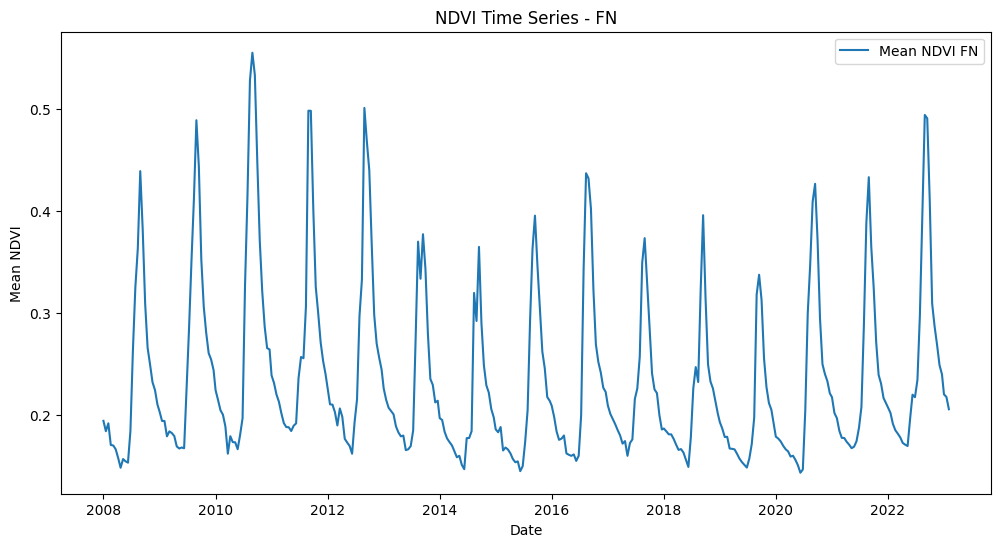

Region: FN
ADF Statistic: -4.367924710679896
p-value: 0.00033812922796569846
--------------------------------------------------


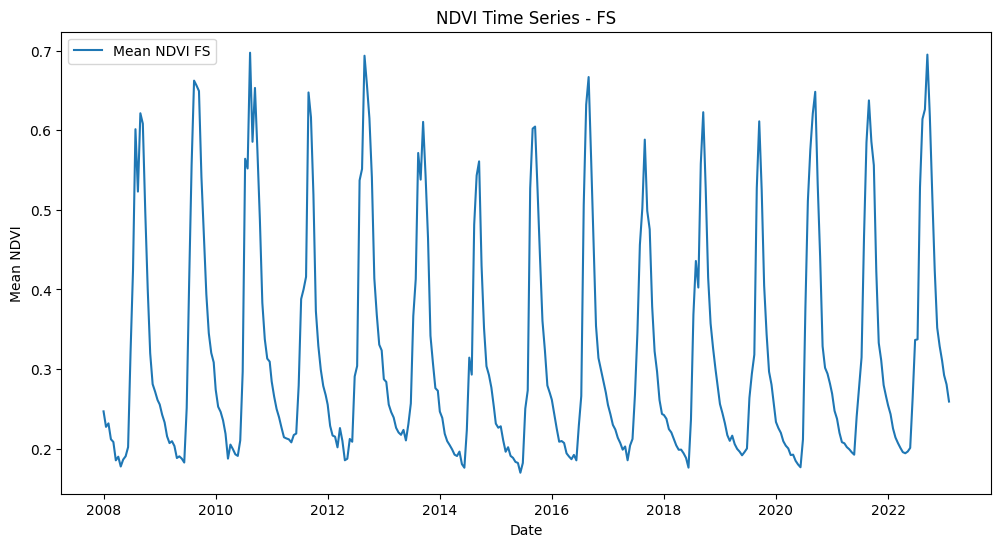

Region: FS
ADF Statistic: -6.787306136010212
p-value: 2.413811661031262e-09
--------------------------------------------------


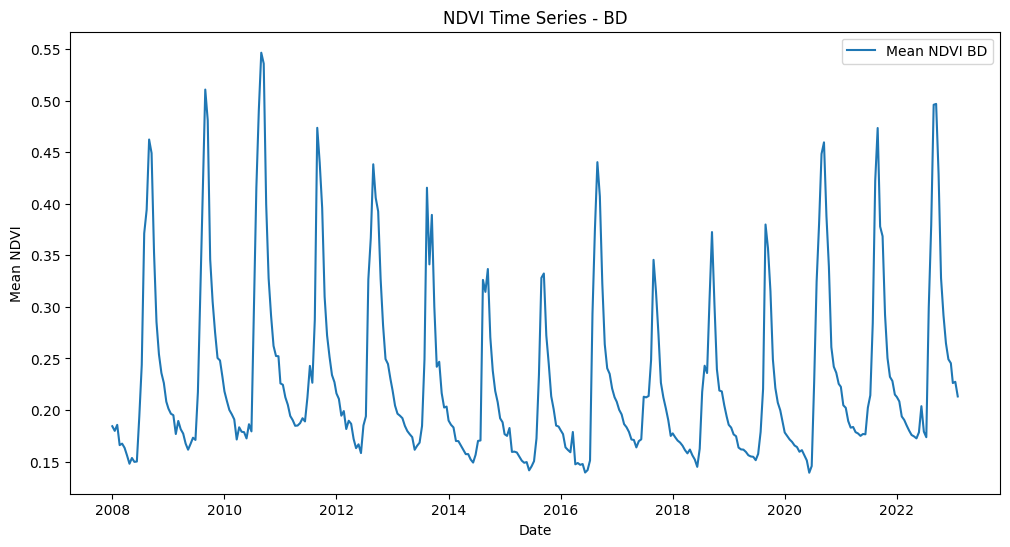

Region: BD
ADF Statistic: -7.368048179449902
p-value: 9.125585435080828e-11
--------------------------------------------------


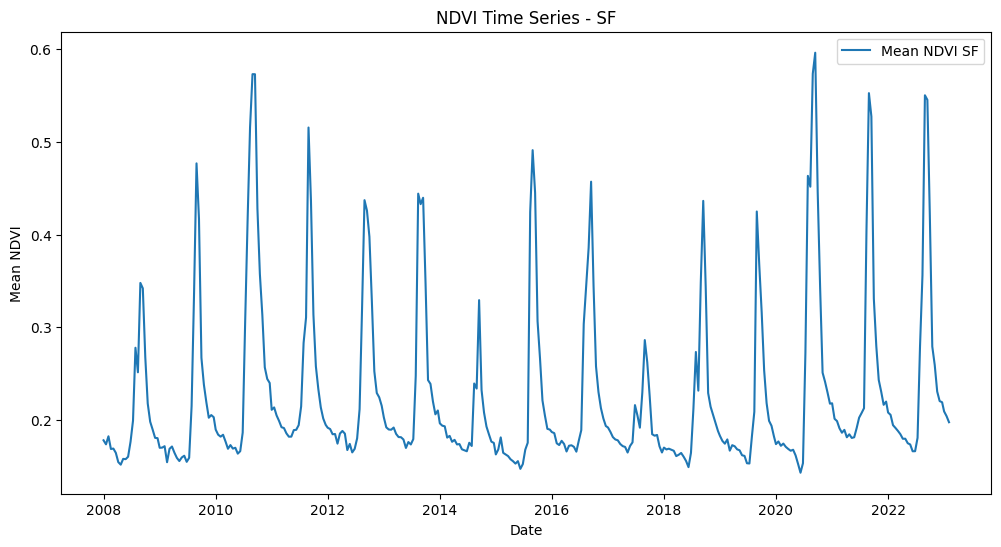

Region: SF
ADF Statistic: -8.624864254675277
p-value: 5.968073339402332e-14
--------------------------------------------------


In [7]:
def plot_and_adf_test(region, df, column):
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    # Plot - the NDVI time series
    plt.figure(figsize=(12, 6))
    plt.plot(df[column], label=f'Mean NDVI {region}')
    plt.title(f'NDVI Time Series - {region}')
    plt.xlabel('Date')
    plt.ylabel('Mean NDVI')
    plt.legend()
    plt.show()
    
    # ADF test
    adf_result = adfuller(df[column])
    adf_statistic = adf_result[0]
    p_value = adf_result[1]
    
    print(f'Region: {region}')
    print(f'ADF Statistic: {adf_statistic}')
    print(f'p-value: {p_value}')
    print('-' * 50)
    
# Application to all region
for region, df in ndvi_data.items():
    plot_and_adf_test(region, df, f'mean_ndvi_{region}')